### 붓꽃(Iris) 데이터 셋을 이용한 클러스터 평가

#### 라이브러리 로드

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣분석 metric값을 구하기 위한 API추가 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#### 함수 구현

* 데이터셋 로드

In [15]:
iris = load_iris()
cols = [feature.replace(' (cm)','') for feature in iris.feature_names]
display(cols)

['sepal length', 'sepal width', 'petal length', 'petal width']

In [2]:
def load_dataset():
    """
    데이터셋 및 array리턴
    """
    iris = load_iris()
    cols = [feature.replace(' (cm)','') for feature in iris.feature_names]
    irisDF = pd.DataFrame(data = iris.data, columns=cols)
    return irisDF, iris
irisDF, iris = load_dataset()

* KMeans실루엣 분석 - 실루엣 계수 및 평균 실루엣 값 

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0 )
# Compute k-means clustering.
kmeans.fit(irisDF)

display(f"Cluster label : {kmeans.labels_}")
irisDF['cluster'] = kmeans.labels_  # 클러스터 값 할당
irisDF.head(3)

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
display(score_samples.shape, type(score_samples))  # (150,), numpy.ndarray

# 실루엣 계수 컬럼 추가 
irisDF["silhouette_coeff"] = score_samples

average_score = silhouette_score(iris.data, irisDF['cluster'], random_state=0)
print(f"Average score for Silhuoette Coeff : {average_score:.2f}")

'Cluster label : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2\n 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2\n 2 0]'

(150,)

numpy.ndarray

Average score for Silhuoette Coeff : 0.55


In [4]:
def process_kmeans_silhouette(df,X):
    """
    데이터프레임 및 피처를 인자로 받아 실루엣분석 후 실루엣계수가 추가된 
    데이터프레임리턴
    """
    kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
    # Compute k-means clustering
    kmeans.fit(df)
    
    display(f"Cluster label : {kmeans.labels_}")
    df['cluster'] = kmeans.labels_  # 클러스터 값 할당
    labels = df['cluster']
    
    # 붓꽃 데이터셋의 모든 개별 데이터에 실루엣 계수 
    score_samples = silhouette_samples(X, labels)
    df["silhuoette_coeff"] = score_samples
    
    display(score_samples.shape, type(score_samples))  # (150,), numpy.ndarray
    
    average_score = silhouette_score(X, labels, random_state=0)
    print(f"Average score for IRIS Dataset : {average_score:.2f}")
    return average_score, df

# KMeans클러스터링 수행 및 실루엣분석
average_score, irisDF = process_kmeans_silhouette(irisDF, iris.data)

'Cluster label : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2\n 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2\n 2 1]'

(150,)

numpy.ndarray

Average score for IRIS Dataset : 0.55


In [5]:
display(irisDF.head(20))

,sepal length,sepal width,petal length,petal width,cluster,silhouette_coeff,silhuoette_coeff
0,5.1,3.5,1.4,0.2,0,0.852955,0.852955
1,4.9,3.0,1.4,0.2,0,0.815495,0.815495
2,4.7,3.2,1.3,0.2,0,0.829315,0.829315
3,4.6,3.1,1.5,0.2,0,0.805014,0.805014
4,5.0,3.6,1.4,0.2,0,0.849302,0.849302
5,5.4,3.9,1.7,0.4,0,0.748280,0.748280
6,4.6,3.4,1.4,0.3,0,0.821651,0.821651
7,5.0,3.4,1.5,0.2,0,0.853905,0.853905
8,4.4,2.9,1.4,0.2,0,0.752150,0.752150
9,4.9,3.1,1.5,0.1,0,0.825294,0.825294


#### 시각화

<AxesSubplot:>

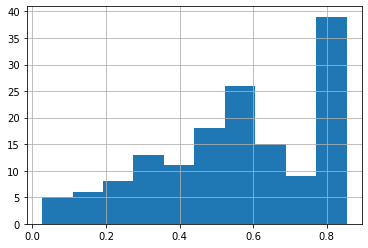

In [6]:
#히스토그램
# 0.8이 Setosa
irisDF['silhuoette_coeff'].hist()

In [7]:
irisDF.groupby("cluster")["silhuoette_coeff"].mean()

cluster
0    0.798140
1    0.417320
2    0.451105
Name: silhuoette_coeff, dtype: float64

### KMeans클러스터링에서 실루엣 분석을 통한 클러스터 객수최적화방법

Sihuoette analysis can be used to study the separation distance between the result clusters. 
The silhoutte plot displays a measure of how close each point in one cluster is to points in the neightboring clusters and thus provides a way to access parameters like number of clusters visually.
This measure has a range of `[-1, 1]`.

Silhuoette coeffiecents (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the samples is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluser.

In this example the silhuoette analysis is used to choose an optimal value for `n_clusters`. 
The silhuoette plot shows that the `n_clusters` value of 3, 5 and 6 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in size of the silhuoette plots. Silhuoette analysis is more ambivalent in deciding between 2 and 4.

Also from the thicknesss of the silhuoette plot the cluster size can be visualized. The silhuoette plot for the cluster 0 when `n_clusters` is equal to 2, is bigger in size owing to the grouping of the 3 sub clustes into one big cluster. However when the `n_clusters` is equal to 4, all the plots are more or less of the similliar thickness and hence are of similiar sizes as can be also verified from the labelled scattered plot on the right.

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


For n_clusters = 2, The average silhuoette is 0.7049787496083262


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


For n_clusters = 3, The average silhuoette is 0.5882004012129721


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


For n_clusters = 4, The average silhuoette is 0.6505186632729437


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


For n_clusters = 5, The average silhuoette is 0.56376469026194


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


For n_clusters = 6, The average silhuoette is 0.4504666294372765


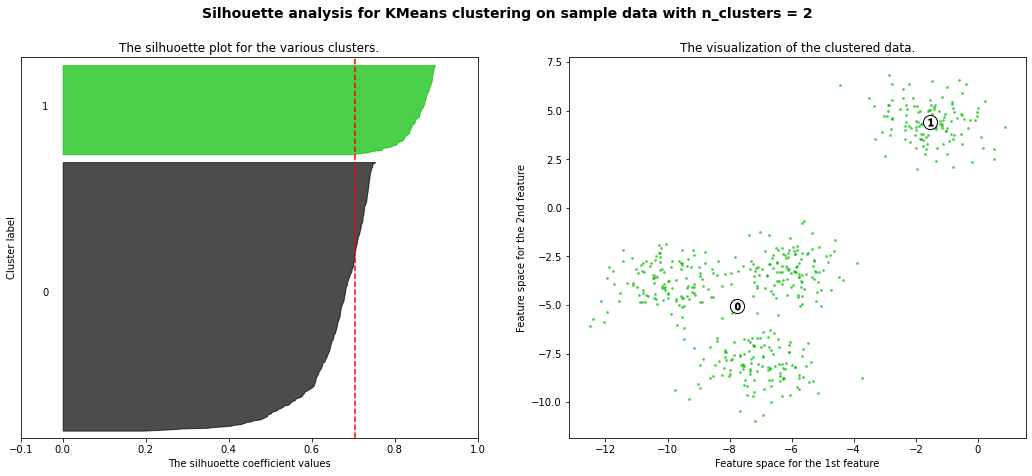

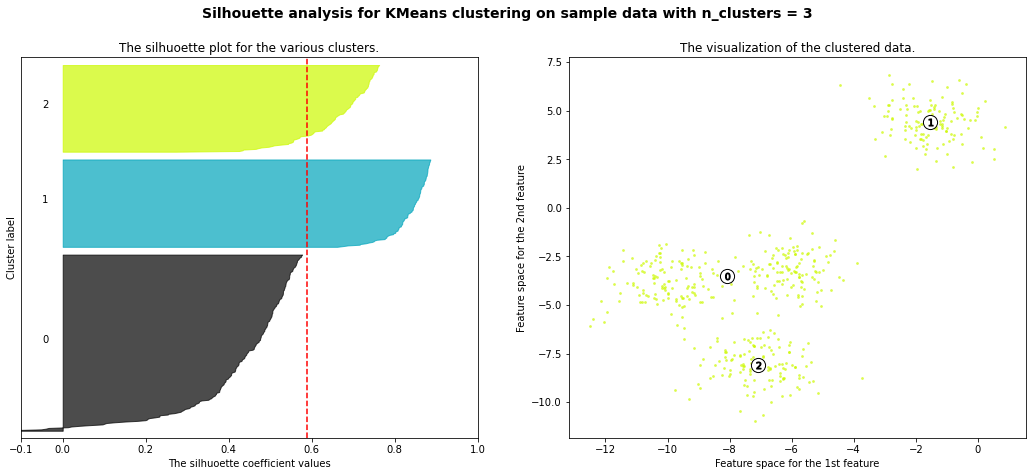

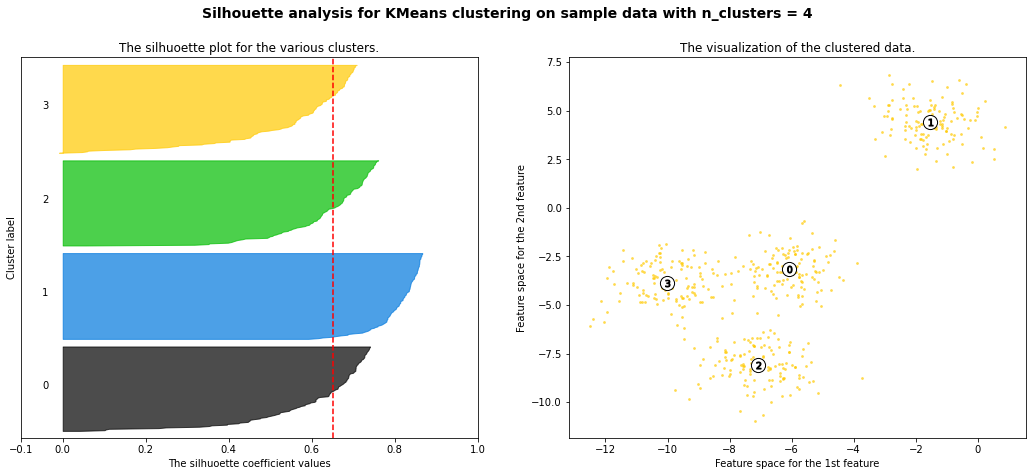

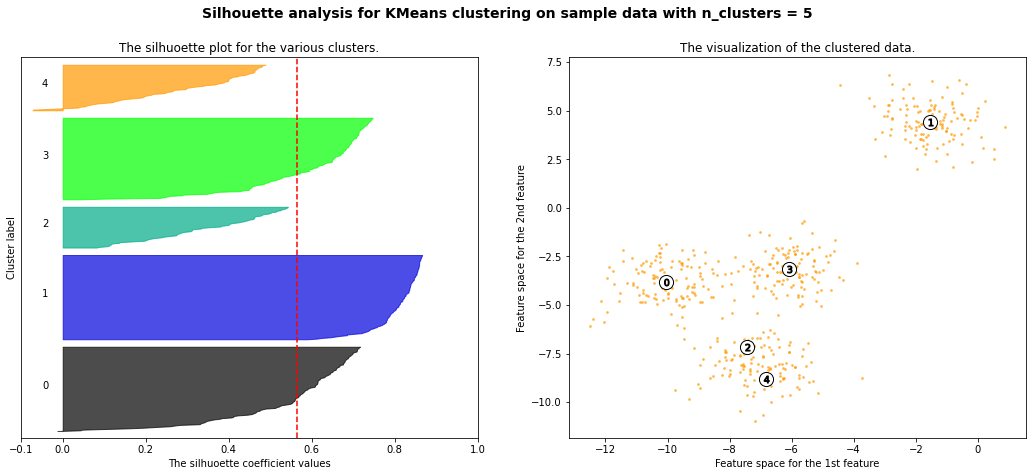

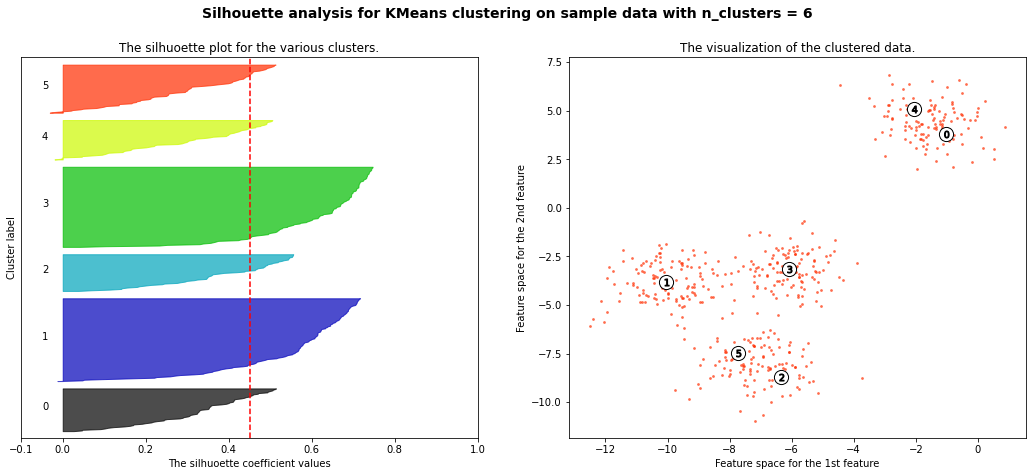

In [23]:
X, y = make_blobs(n_samples=500,n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0),shuffle=True,\
                 random_state=1)
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st sibplot is the silhuoette plot
    # The silhuoette coefficient can range from -1, 1 but in this example all
    # Lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters + 1) * 10 is for inserting blank space between silhuoeet 
    # plots of individual clusters to demonstrate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusters with n_clusters values and a random generator 
    # seed of 10 for reproducibility.
    cluster = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = cluster.fit_predict(X)
    
    # The silhuoette_score gives the average valur for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhuoette_average = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhuoette is {silhuoette_average}")
    
    # Compute the silhuoette scores for each sample
    sample_silhuoette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhuoette scores for samples belinging to cluster i, and sort them
        ith_clusters_silhuoette_values = sample_silhuoette_values[cluster_labels == i]
        ith_clusters_silhuoette_values.sort()
        
        size_cluster_i = ith_clusters_silhuoette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        #print(np.arange(y_lower, y_upper))
        ax1.fill_betweenx(np.arange(y_lower,  y_upper), 0, ith_clusters_silhuoette_values,facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhuoette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_title("The silhuoette plot for the various clusters.")
    ax1.set_xlabel("The silhuoette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhuoette score of all the values
    ax1.axvline(x=silhuoette_average, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s = 30, lw=0, alpha=0.7, c=color, edgecolor='k')
    
    # Lebeling the clusters
    centers = cluster.cluster_centers_  # 중심점
    
    # Draw write circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')
plt.show()

### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

* [사이킷 군집별 평균 실루엣계수 시각화](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [ ]:
make_blobs(n_samples = 500, n_features = 2, centers=4, cluster_std=1, )

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

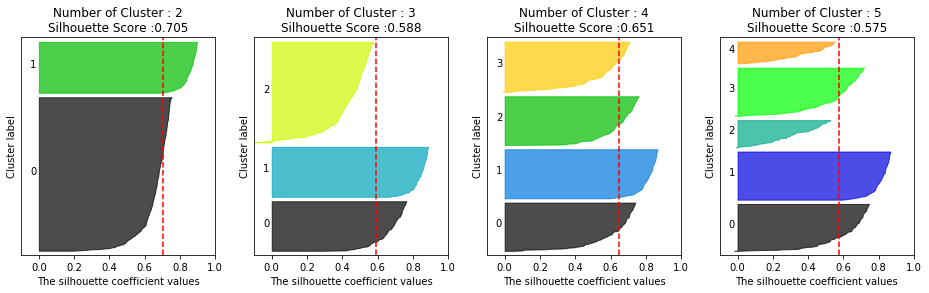

In [ ]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

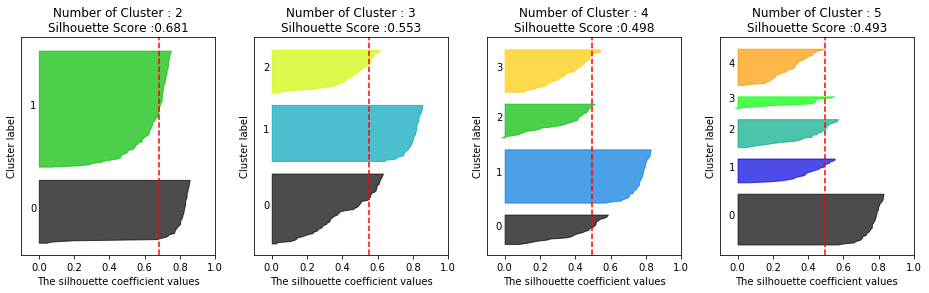

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)